In [ ]:
## Getting training data
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

data = pd.read_csv('train.csv').values
X = data[:,1:]
Y = data[:,0]

In [5]:
##helper functions to organize, normalize, and make folds of the data
def getData(X, Y, folds, normalize):
    
    if(normalize==True): X = X/X.max()
    
    kf = KFold(n_splits=folds)
    kf.get_n_splits(X)
    
    print(kf)  
    train_data = []
    test_data = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        train_data.append((X_train,Y_train))
        test_data.append((X_test, Y_test))
        
    return train_data, test_data

def getTrainingData(X, Y, train_ratio, normalize=True):
    
    TRAINING_SIZE = (int)(len(data)*train_ratio)
    
    if(normalize==True): X = X/X.max()
    
    X_train = X[0:TRAINING_SIZE,:]
    Y_train = Y[0:TRAINING_SIZE]
   
    return X_train, Y_train

def getTestingData(X, Y, train_ratio, test_size, test_remaining=False, normalize=True):
    
    TRAINING_SIZE = (int)(len(data)*train_ratio)
    
    if(normalize==True): X = X/X.max()
    
    if test_remaining==True:
        X_test = X[TRAINING_SIZE:,:]
        Y_test = Y[TRAINING_SIZE:]
    else:
        X_test = X[TRAINING_SIZE:TRAINING_SIZE+test_size,:]
        Y_test = Y[TRAINING_SIZE:TRAINING_SIZE+test_size]
    
    return X_test, Y_test

In [6]:
# get the different data sets and cross-validation data sets
set_names = ["Non-normalized Data", "Normalized Data"]
rawTrainSets, rawTestSets = getData(X, Y, 5, False)
normTrainSets, normTestSets = getData(X, Y, 5, True)
train_sets = [rawTrainSets, normTrainSets]

KFold(n_splits=5, random_state=None, shuffle=False)
KFold(n_splits=5, random_state=None, shuffle=False)


In [34]:
#the different combinations of parameters
params = [{'activation':'identity', 'solver':'lbfgs'},
          {'activation':'identity', 'solver':'sgd'},
          {'activation':'identity', 'solver':'adam'},
          {'activation':'logistic', 'solver':'lbfgs'},
          {'activation':'logistic', 'solver':'sgd'},
          {'activation':'logistic', 'solver':'adam'},
          {'activation':'tanh', 'solver':'lbfgs'},
          {'activation':'tanh', 'solver':'sgd'},
          {'activation':'tanh', 'solver':'adam'},
          {'activation':'relu', 'solver':'lbfgs'},
          {'activation':'relu', 'solver':'sgd'},
          {'activation':'relu', 'solver':'adam'}]
#different lables for diagrams
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'black', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '--'}]



In [15]:
##the training phase
mlps = []
for data_type in train_sets:
    print("Data type")
    for param, plot_arg in zip(params, plot_args):
        print(param)
        X_train, Y_train = data_type[4]
        mlp = MLPClassifier(verbose = True, **param)
        mlp.fit(X_train, Y_train)
        mlps.append(mlp)
        print("done training!")
print("done all training!")

Data type
{'activation': 'identity', 'solver': 'lbfgs'}
done training!
{'activation': 'identity', 'solver': 'adam'}
Iteration 1, loss = 3.60580133
Iteration 2, loss = 2.35019730
Iteration 3, loss = 2.17454987
Iteration 4, loss = 2.05065949
Iteration 5, loss = 1.95510323
Iteration 6, loss = 1.86056181
Iteration 7, loss = 1.69745940
Iteration 8, loss = 1.66125793
Iteration 9, loss = 1.59919274
Iteration 10, loss = 1.47493956
Iteration 11, loss = 1.47287432
Iteration 12, loss = 1.27968271
Iteration 13, loss = 1.31600917
Iteration 14, loss = 1.15008278
Iteration 15, loss = 1.06999472
Iteration 16, loss = 0.98060414
Iteration 17, loss = 0.89716635
Iteration 18, loss = 0.78467951
Iteration 19, loss = 0.75966320
Iteration 20, loss = 0.71346369
Iteration 21, loss = 0.62502266
Iteration 22, loss = 0.54776731
Iteration 23, loss = 0.51732827
Iteration 24, loss = 0.48256275
Iteration 25, loss = 0.45633121
Iteration 26, loss = 0.40679977
Iteration 27, loss = 0.37952192
Iteration 28, loss = 0.378413

Iteration 135, loss = 0.06758569
Iteration 136, loss = 0.06716985
Iteration 137, loss = 0.06695774
Iteration 138, loss = 0.06674612
Iteration 139, loss = 0.06655819
Iteration 140, loss = 0.06637406
Iteration 141, loss = 0.06619590
Iteration 142, loss = 0.06606494
Iteration 143, loss = 0.06608970
Iteration 144, loss = 0.06584717
Iteration 145, loss = 0.06569253
Iteration 146, loss = 0.06549976
Iteration 147, loss = 0.06533988
Iteration 148, loss = 0.06511542
Iteration 149, loss = 0.06493253
Iteration 150, loss = 0.06475983
Iteration 151, loss = 0.06460977
Iteration 152, loss = 0.06443533
Iteration 153, loss = 0.06429653
Iteration 154, loss = 0.06417547
Iteration 155, loss = 0.06403810
Iteration 156, loss = 0.06395979
Iteration 157, loss = 0.06381949
Iteration 158, loss = 0.06365072
Iteration 159, loss = 0.06358490
Iteration 160, loss = 0.06337240
Iteration 161, loss = 0.06323302
Iteration 162, loss = 0.06311908
Iteration 163, loss = 0.06294904
Iteration 164, loss = 0.06281478
Iteration 

E:\Programs\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86152931
Iteration 2, loss = 0.39842340
Iteration 3, loss = 0.32487735
Iteration 4, loss = 0.29494567
Iteration 5, loss = 0.27497261
Iteration 6, loss = 0.26022460
Iteration 7, loss = 0.24703849
Iteration 8, loss = 0.22960545
Iteration 9, loss = 0.21880975
Iteration 10, loss = 0.21088259
Iteration 11, loss = 0.20944384
Iteration 12, loss = 0.20258209
Iteration 13, loss = 0.20043905
Iteration 14, loss = 0.21097658
Iteration 15, loss = 0.20302426
Iteration 16, loss = 0.19336805
Iteration 17, loss = 0.19749800
Iteration 18, loss = 0.19720826
Iteration 19, loss = 0.19191741
Iteration 20, loss = 0.18947347
Iteration 21, loss = 0.18708370
Iteration 22, loss = 0.18935178
Iteration 23, loss = 0.18686775
Iteration 24, loss = 0.17595157
Iteration 25, loss = 0.17927160
Iteration 26, loss = 0.17102960
Iteration 27, loss = 0.16929063
Iteration 28, loss = 0.17175223
Iteration 29, loss = 0.16811581
Iteration 30, loss = 0.16660428
Iteration 31, loss = 0.16228345
Iteration 32, los

Iteration 153, loss = 0.07454667
Iteration 154, loss = 0.07320668
Iteration 155, loss = 0.07576009
Iteration 156, loss = 0.07533797
Iteration 157, loss = 0.07371025
Iteration 158, loss = 0.07340942
Iteration 159, loss = 0.07279422
Iteration 160, loss = 0.07203054
Iteration 161, loss = 0.07285870
Iteration 162, loss = 0.07275519
Iteration 163, loss = 0.07165352
Iteration 164, loss = 0.07007165
Iteration 165, loss = 0.07252324
Iteration 166, loss = 0.07179914
Iteration 167, loss = 0.06733847
Iteration 168, loss = 0.06998336
Iteration 169, loss = 0.06753002
Iteration 170, loss = 0.06705239
Iteration 171, loss = 0.06801920
Iteration 172, loss = 0.06852631
Iteration 173, loss = 0.06525591
Iteration 174, loss = 0.06412710
Iteration 175, loss = 0.06335593
Iteration 176, loss = 0.06324946
Iteration 177, loss = 0.06413457
Iteration 178, loss = 0.06453771
Iteration 179, loss = 0.06357122
Iteration 180, loss = 0.06207450
Iteration 181, loss = 0.06718813
Iteration 182, loss = 0.06525992
Iteration 

E:\Programs\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.87896157
Iteration 2, loss = 0.46285294
Iteration 3, loss = 0.38962460
Iteration 4, loss = 0.35264240
Iteration 5, loss = 0.32744808
Iteration 6, loss = 0.31284734
Iteration 7, loss = 0.30272661
Iteration 8, loss = 0.29489619
Iteration 9, loss = 0.28514719
Iteration 10, loss = 0.29820993
Iteration 11, loss = 0.28960142
Iteration 12, loss = 0.28676491
Iteration 13, loss = 0.28165978
Iteration 14, loss = 0.28087466
Iteration 15, loss = 0.28409267
Iteration 16, loss = 0.27738593
Iteration 17, loss = 0.26380579
Iteration 18, loss = 0.26221893
Iteration 19, loss = 0.25264210
Iteration 20, loss = 0.24964564
Iteration 21, loss = 0.24818735
Iteration 22, loss = 0.25049653
Iteration 23, loss = 0.24599276
Iteration 24, loss = 0.24541602
Iteration 25, loss = 0.23946214
Iteration 26, loss = 0.23151769
Iteration 27, loss = 0.23837630
Iteration 28, loss = 0.23333042
Iteration 29, loss = 0.24175907
Iteration 30, loss = 0.24089026
Iteration 31, loss = 0.24212110
Iteration 32, los

Iteration 184, loss = 0.14528287
Iteration 185, loss = 0.14112058
Iteration 186, loss = 0.13980044
Iteration 187, loss = 0.14197415
Iteration 188, loss = 0.14123034
Iteration 189, loss = 0.13826431
Iteration 190, loss = 0.13706408
Iteration 191, loss = 0.14126365
Iteration 192, loss = 0.13950159
Iteration 193, loss = 0.13794911
Iteration 194, loss = 0.13931562
Iteration 195, loss = 0.13648555
Iteration 196, loss = 0.13840458
Iteration 197, loss = 0.13801771
Iteration 198, loss = 0.13687169
Iteration 199, loss = 0.13925344
Iteration 200, loss = 0.13485659
done training!
{'activation': 'relu', 'solver': 'adam'}


E:\Programs\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 3.47778555
Iteration 2, loss = 1.21260981
Iteration 3, loss = 0.72837056
Iteration 4, loss = 0.47987356
Iteration 5, loss = 0.35036288
Iteration 6, loss = 0.26646715
Iteration 7, loss = 0.21756140
Iteration 8, loss = 0.17848847
Iteration 9, loss = 0.15124450
Iteration 10, loss = 0.12518843
Iteration 11, loss = 0.10986400
Iteration 12, loss = 0.09333308
Iteration 13, loss = 0.09139726
Iteration 14, loss = 0.08143787
Iteration 15, loss = 0.07969233
Iteration 16, loss = 0.07386349
Iteration 17, loss = 0.07817884
Iteration 18, loss = 0.08784278
Iteration 19, loss = 0.10199608
Iteration 20, loss = 0.09655791
Iteration 21, loss = 0.09197908
Iteration 22, loss = 0.09050159
Iteration 23, loss = 0.09155303
Iteration 24, loss = 0.09285907
Iteration 25, loss = 0.08823145
Iteration 26, loss = 0.07743685
Iteration 27, loss = 0.07999732
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
done training!
Data type
{'activation': 'identity', 'so

Iteration 88, loss = 0.19624109
Iteration 89, loss = 0.19267555
Iteration 90, loss = 0.19419007
Iteration 91, loss = 0.19435580
Iteration 92, loss = 0.19596306
Iteration 93, loss = 0.19496932
Iteration 94, loss = 0.19319046
Iteration 95, loss = 0.19163999
Iteration 96, loss = 0.19264514
Iteration 97, loss = 0.19369364
Iteration 98, loss = 0.19329407
Iteration 99, loss = 0.19257845
Iteration 100, loss = 0.19254395
Iteration 101, loss = 0.19204014
Iteration 102, loss = 0.19176080
Iteration 103, loss = 0.19417909
Iteration 104, loss = 0.19076204
Iteration 105, loss = 0.19165942
Iteration 106, loss = 0.19122483
Iteration 107, loss = 0.19007919
Iteration 108, loss = 0.19094812
Iteration 109, loss = 0.19087736
Iteration 110, loss = 0.19051048
Iteration 111, loss = 0.19199643
Iteration 112, loss = 0.19096032
Iteration 113, loss = 0.19048722
Iteration 114, loss = 0.19100716
Iteration 115, loss = 0.19115181
Iteration 116, loss = 0.18993123
Iteration 117, loss = 0.18956602
Iteration 118, loss = 

Iteration 195, loss = 0.27144267
Iteration 196, loss = 0.27099603
Iteration 197, loss = 0.27061816
Iteration 198, loss = 0.27017486
Iteration 199, loss = 0.26974185
Iteration 200, loss = 0.26933417
done training!
{'activation': 'logistic', 'solver': 'adam'}


E:\Programs\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.15713746
Iteration 2, loss = 0.45057239
Iteration 3, loss = 0.33163987
Iteration 4, loss = 0.28007344
Iteration 5, loss = 0.24776371
Iteration 6, loss = 0.22349405
Iteration 7, loss = 0.20422084
Iteration 8, loss = 0.18816210
Iteration 9, loss = 0.17460438
Iteration 10, loss = 0.16238531
Iteration 11, loss = 0.15211266
Iteration 12, loss = 0.14182047
Iteration 13, loss = 0.13339611
Iteration 14, loss = 0.12512964
Iteration 15, loss = 0.11804393
Iteration 16, loss = 0.11077084
Iteration 17, loss = 0.10436711
Iteration 18, loss = 0.09869505
Iteration 19, loss = 0.09292261
Iteration 20, loss = 0.08753109
Iteration 21, loss = 0.08294339
Iteration 22, loss = 0.07813032
Iteration 23, loss = 0.07421899
Iteration 24, loss = 0.07030430
Iteration 25, loss = 0.06603145
Iteration 26, loss = 0.06269077
Iteration 27, loss = 0.05952010
Iteration 28, loss = 0.05577489
Iteration 29, loss = 0.05286513
Iteration 30, loss = 0.05022467
Iteration 31, loss = 0.04747298
Iteration 32, los

Iteration 153, loss = 0.15172581
Iteration 154, loss = 0.15114583
Iteration 155, loss = 0.15056376
Iteration 156, loss = 0.14994264
Iteration 157, loss = 0.14937754
Iteration 158, loss = 0.14877957
Iteration 159, loss = 0.14818980
Iteration 160, loss = 0.14764183
Iteration 161, loss = 0.14710010
Iteration 162, loss = 0.14645903
Iteration 163, loss = 0.14591575
Iteration 164, loss = 0.14538439
Iteration 165, loss = 0.14484879
Iteration 166, loss = 0.14433207
Iteration 167, loss = 0.14374959
Iteration 168, loss = 0.14320686
Iteration 169, loss = 0.14266132
Iteration 170, loss = 0.14216440
Iteration 171, loss = 0.14162026
Iteration 172, loss = 0.14107526
Iteration 173, loss = 0.14058752
Iteration 174, loss = 0.14001577
Iteration 175, loss = 0.13951620
Iteration 176, loss = 0.13902016
Iteration 177, loss = 0.13850600
Iteration 178, loss = 0.13800099
Iteration 179, loss = 0.13745354
Iteration 180, loss = 0.13695883
Iteration 181, loss = 0.13649489
Iteration 182, loss = 0.13599038
Iteration 

E:\Programs\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.57052775
Iteration 2, loss = 0.28550713
Iteration 3, loss = 0.23063282
Iteration 4, loss = 0.19383602
Iteration 5, loss = 0.16575262
Iteration 6, loss = 0.14403163
Iteration 7, loss = 0.12713995
Iteration 8, loss = 0.11238964
Iteration 9, loss = 0.10037876
Iteration 10, loss = 0.08985925
Iteration 11, loss = 0.08040498
Iteration 12, loss = 0.07204275
Iteration 13, loss = 0.06395075
Iteration 14, loss = 0.05854902
Iteration 15, loss = 0.05216490
Iteration 16, loss = 0.04719193
Iteration 17, loss = 0.04218115
Iteration 18, loss = 0.03769627
Iteration 19, loss = 0.03408425
Iteration 20, loss = 0.03019101
Iteration 21, loss = 0.02753883
Iteration 22, loss = 0.02454955
Iteration 23, loss = 0.02202867
Iteration 24, loss = 0.01966340
Iteration 25, loss = 0.01767700
Iteration 26, loss = 0.01570135
Iteration 27, loss = 0.01390354
Iteration 28, loss = 0.01277124
Iteration 29, loss = 0.01136091
Iteration 30, loss = 0.01031014
Iteration 31, loss = 0.00942185
Iteration 32, los

Iteration 185, loss = 0.10932643
Iteration 186, loss = 0.10892772
Iteration 187, loss = 0.10843597
Iteration 188, loss = 0.10801459
Iteration 189, loss = 0.10754736
Iteration 190, loss = 0.10714575
Iteration 191, loss = 0.10667694
Iteration 192, loss = 0.10620843
Iteration 193, loss = 0.10585526
Iteration 194, loss = 0.10538062
Iteration 195, loss = 0.10498993
Iteration 196, loss = 0.10452576
Iteration 197, loss = 0.10408084
Iteration 198, loss = 0.10365820
Iteration 199, loss = 0.10324656
Iteration 200, loss = 0.10289050
done training!
{'activation': 'relu', 'solver': 'adam'}


E:\Programs\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.56788591
Iteration 2, loss = 0.25986906
Iteration 3, loss = 0.20131432
Iteration 4, loss = 0.16496219
Iteration 5, loss = 0.13869903
Iteration 6, loss = 0.11995961
Iteration 7, loss = 0.10636657
Iteration 8, loss = 0.09276993
Iteration 9, loss = 0.08287067
Iteration 10, loss = 0.07389683
Iteration 11, loss = 0.06678842
Iteration 12, loss = 0.05865556
Iteration 13, loss = 0.05241513
Iteration 14, loss = 0.04691898
Iteration 15, loss = 0.04271602
Iteration 16, loss = 0.03823691
Iteration 17, loss = 0.03473586
Iteration 18, loss = 0.03121526
Iteration 19, loss = 0.02784310
Iteration 20, loss = 0.02448424
Iteration 21, loss = 0.02222189
Iteration 22, loss = 0.01995100
Iteration 23, loss = 0.01820155
Iteration 24, loss = 0.01611032
Iteration 25, loss = 0.01408194
Iteration 26, loss = 0.01306078
Iteration 27, loss = 0.01157071
Iteration 28, loss = 0.01052845
Iteration 29, loss = 0.00964361
Iteration 30, loss = 0.00833532
Iteration 31, loss = 0.00736664
Iteration 32, los

{'activation': 'identity', 'solver': 'lbfgs'}                	 0.8844047619047619
Training set loss: 0.580078
{'activation': 'identity', 'solver': 'adam'}                 	 0.8961904761904762
Training set loss: 0.359154
{'activation': 'identity', 'solver': 'adam'}                 	 0.8963095238095238
Training set loss: 0.359760
{'activation': 'logistic', 'solver': 'lbfgs'}                	 0.945952380952381
Training set loss: 0.101888
{'activation': 'logistic', 'solver': 'sgd'}                  	 0.9458333333333333
Training set loss: 0.059008
{'activation': 'logistic', 'solver': 'adam'}                 	 0.9570238095238095
Training set loss: 0.113280
{'activation': 'tanh', 'solver': 'lbfgs'}                    	 0.9410714285714286
Training set loss: 0.114673
{'activation': 'tanh', 'solver': 'sgd'}                      	 0.9595238095238096
Training set loss: 0.056344
{'activation': 'tanh', 'solver': 'adam'}                     	 0.9325
Training set loss: 0.207249
{'activation': 'relu', 

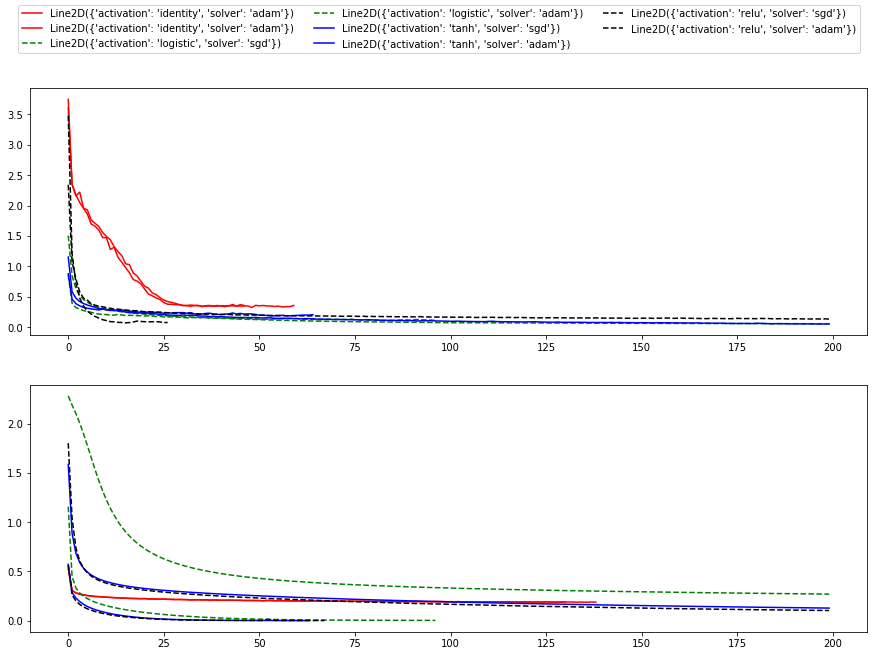

In [70]:
#the testing phase

i=0

test_sets = [rawTestSets, normTestSets]
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
for test_set, set_name, ax in zip(test_sets, set_names, axes.ravel()):
    X_test, y_test = test_set[4]
    j=12*i
    f = 12*(i+1)
    while(j<f):
        str1 = str(params[j%12])
        str2 = str(mlps[j].score(X_test, y_test))
        print("%-60s \t %s\n" % (str1, str2), end='')
        print("Training set loss: %f" % mlps[j].loss_)
        solver = params[j%12].get("solver")
        if(solver!="lbfgs"):
            ax.plot(mlps[j].loss_curve_, label=str(params[j%12]), **plot_args[j%12])
        j += 1
    i += 1
    
fig.legend(ax.get_lines(), ncol=3, loc="upper center")
plt.show()